In [1]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# データ確認

In [2]:
ctrl_type = "RETT"
rett_type = "HPS9999"
chip_type = "CTCF"
home_path = "../Classification"

if ctrl_type=="RETT":
    image_path = f"{ctrl_type}_{rett_type}_{chip_type}"
else: 
    image_path = f"{ctrl_type}_{chip_type}"

# データの読み込み

len(kp):  212


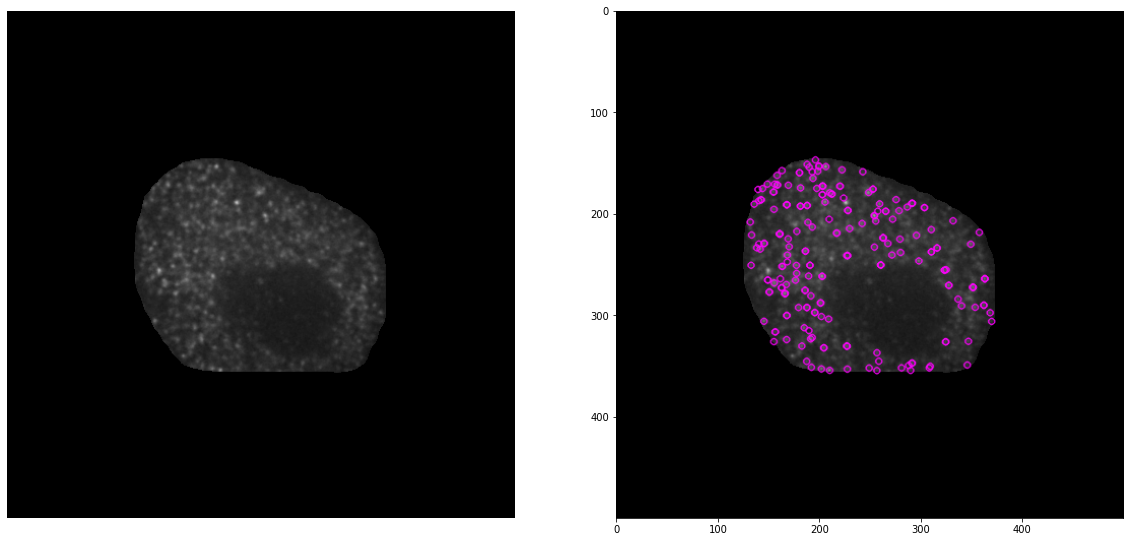

len(kp):  328


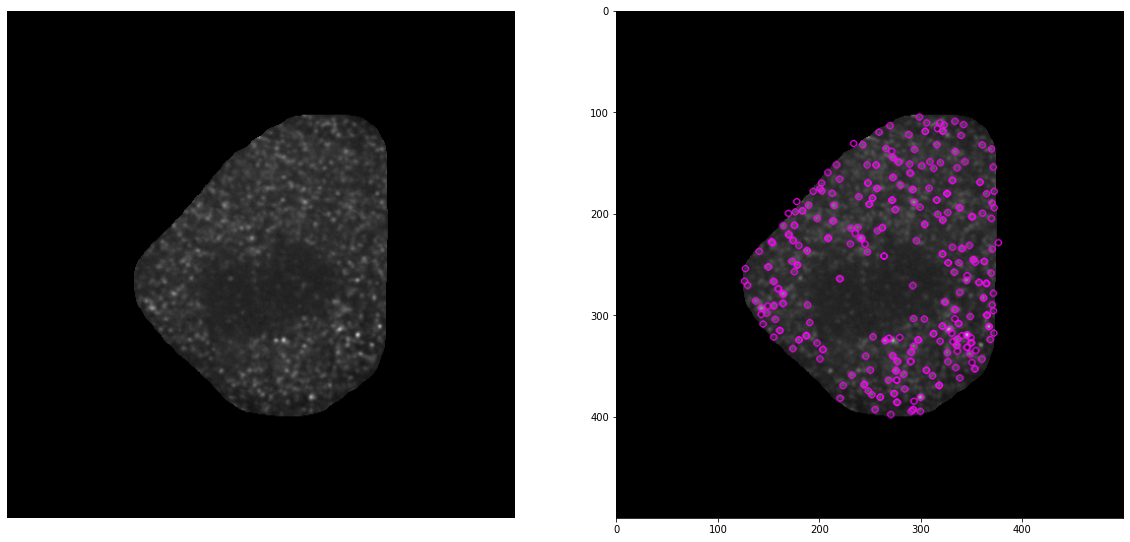

len(kp):  94


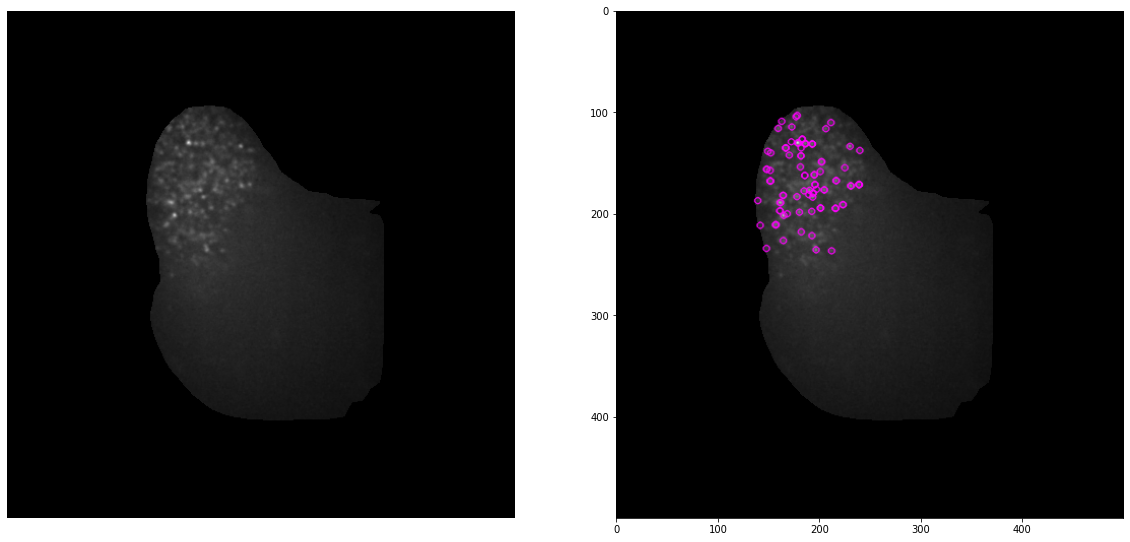

len(kp):  694


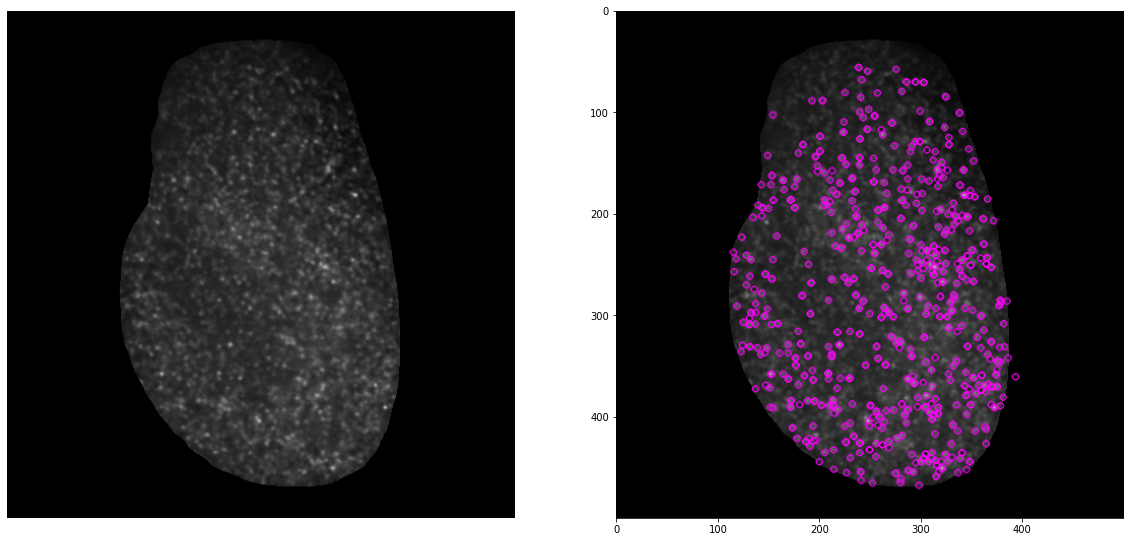

In [7]:
sift = cv2.SIFT_create()
    
for im in range(4):
    image = np.load(f"{home_path}/Datasets/{image_path}.npy", allow_pickle=True)[im]
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #灰度处理图像
    kp, des = sift.detectAndCompute(gray,None)   #des是描述子
    img_kp = cv2.drawKeypoints(image, kp, gray, color=(255,0,255)) #画出特征点，并显示为红色圆圈
    print("len(kp): ", len(kp))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.show()

# 特徴点の抽出

In [8]:
k = 10
detector = cv2.SIFT_create()
trainer = cv2.BOWKMeansTrainer(k)

keypoints = []
directors = []

DataPathremove = []
DataLabelremove = []

for i in range(len(DataPath)):
    path = DataPath[i]
    img = cv2.imread(path)
    ks, ds = detector.detectAndCompute(img, None)
    if len(ks) == 0:
        print("Keypoint of ", path," is None, so remove it from DataPath")
    else:
        DataPathremove.append(DataPath[i])
        DataLabelremove.append(DataLabel[i])
        trainer.add(ds.astype(np.float32))
        keypoints.append(ks)
        directors.append(ds)

# クラスタリング

In [76]:
dictionary = trainer.cluster()
print("dictionary: ",dictionary.shape)

dictionary:  (10, 128)


In [77]:
dictionary[1]

array([ 26.496489,  26.1987  ,  28.040833,  28.043173,  26.56333 ,
        23.449415,  21.205982,  21.815346,  48.62861 ,  38.314693,
        29.667881,  26.06502 ,  26.89805 ,  26.60156 ,  27.016125,
        35.25514 ,  30.777634,  29.502731,  32.519375,  37.23823 ,
        38.385437,  34.383877,  27.923018,  27.148504,  27.106112,
        27.471262,  28.783096,  28.321457,  25.170351,  22.395319,
        22.017946,  24.32952 ,  31.492329,  27.080885,  33.27204 ,
        46.320156,  49.100132,  35.480625,  21.258257,  18.717556,
       114.92406 ,  47.050716,  22.072561,  19.879583,  24.777374,
        34.20156 ,  34.518597,  64.51183 ,  34.567753,  19.243174,
        19.838491,  31.56099 ,  84.06606 ,  94.539406,  48.992718,
        32.83459 ,  36.475163,  35.737843,  32.62991 ,  28.56177 ,
        30.86138 ,  33.16021 ,  31.23095 ,  33.581276,  30.491549,
        18.148766,  21.308193,  36.00156 ,  49.247597,  46.965412,
        33.408062,  26.416645, 116.28088 ,  74.46164 ,  28.938

# ヒストグラム

In [78]:
matcher = cv2.BFMatcher()
extractor = cv2.BOWImgDescriptorExtractor(detector, matcher)
extractor.setVocabulary(dictionary)
descriptor_list = []
for path in DataPath:
    img = cv2.imread(path)
    ks = detector.detect(img, None)
    descriptor = extractor.compute(img, ks)[0]
    descriptor_list.append(descriptor)

print("descriptor: ",type(descriptor))
print("descriptor: ",descriptor.shape)
print("descriptor_list: ",type(descriptor_list))
print("descriptor_list: ",len(descriptor_list))

descriptor:  <class 'numpy.ndarray'>
descriptor:  (10,)
descriptor_list:  <class 'list'>
descriptor_list:  30


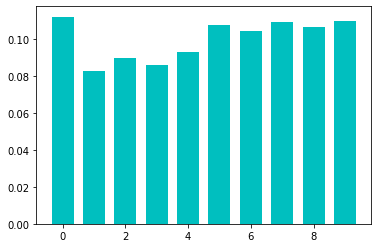

In [79]:
hist = descriptor_list[1]
x = [0,1,2,3,4,5,6,7,8,9]

plt.bar(x, hist, 0.7, color='c')
plt.show()

-------